# <font color='#c0507d'>Final Project</font>
by **Anat Levin** `(i.d 321710402)` , **Gali Arba** `(i.d 316576016)` and **Ori Leibovich** `(i.d 315816629) - אישור מילואים` 


In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

file_path = r'C:\Users\anatl\OneDrive\Desktop\Files\טכניון\קורסים\אביב 23-24\מבוא לניתוח נתונים - 094202\ש.ב (עם גאלי)\מיני-פרויקט\Los Angeles Crime Data\crime_in_la.csv'
data = pd.read_csv(file_path)
data.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,190326475,01/03/2020,21:30,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,M,O,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,08/02/2020,18:00,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,04/11/2020,17:00,3,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,10/03/2020,20:37,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,17/08/2020,12:00,6,Hollywood,666,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


# <font color='#585eaf'>Part 1: Choosing a dataset</font>
### 1) Chosen Dataset:
Los Angeles Crime Data (2020-2023)

### 2) Background:
This dataset consists a large scale records of crimes reported in Los Angeles between 2020 and 2022. It features information including the nature of the crime, its location, date, time, and other relevant details. As presented in the UCR Manual, the crime dataset serves as a tool for understanding the nature of crime within law enforcement jurisdictions. Which can, if reviewed properly, present a clear picture and gain an understanding of steps needed to effectively address crime, by analyzing crime trends, pinpointing hotspots, and examining the temporal distribution of different crime categories throughout Los Angeles.

### 3) Dataset features and types:

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           963006 non-null  int64  
 1   DATE OCC        963006 non-null  object 
 2   TIME OCC        963006 non-null  object 
 3   AREA            963006 non-null  int64  
 4   AREA NAME       963006 non-null  object 
 5   Rpt Dist No     963006 non-null  int64  
 6   Crm Cd          963006 non-null  int64  
 7   Crm Cd Desc     963006 non-null  object 
 8   Mocodes         963006 non-null  object 
 9   Vict Age        963006 non-null  int64  
 10  Vict Sex        963006 non-null  object 
 11  Vict Descent    963006 non-null  object 
 12  Premis Desc     962431 non-null  object 
 13  Weapon Used Cd  963006 non-null  float64
 14  Weapon Desc     963006 non-null  object 
 15  Status          963005 non-null  object 
 16  Status Desc     963006 non-null  object 
 17  LOCATION  

- Following the data card, we concluded the dataset contains the following features:
1. `DR_NO` - int64 -  crime record number.
2. `DATE OCC` - object - date at which crime occurred (DD/MM/YYYY).
3. `TIME OCC` - object - time at which crime occurred (24H format).
4. `AREA` - int 64 - the LAPD 21 stations reffered to as geographic area codes at which crime occurred.
5. `AREA NAME` - object - area name where the crime occurred.
6. `Rpt Dist No`- int64 - reporting district number.
7. `Crm Cd` - int64 - crime code.
8. `Crm Cd Desc` - object - description of the crime commited.
9. `Mocodes` - object - Modus Operandi, a code describing the criminals method of operation used in the crime.
10. `Vict Age` - int64 - victims age (0 for unknown).
11. `Vict Sex` - object - victims gender (X for unknown).
12. `Vict Descent` - object - victims ethnic descent.
13. `Premis Desc` - object - description of the premises where the crime took place.
14. `Weapon Used Cd` - float64 - a code for the weapon used in the crime.
15. `Weapon Desc` - object - description of the weapon used.
16. `Status` - object - status of the crime report (e.g., completed, pending).
17. `Status Desc` - object - description of the status.
18. `LOCATION` - object - street address of crime incident (rounded to the nearest hundred block to maintain anonymity).
19. `LAT` - float64 - latitude of the crimes location.
20. `LON` - float64 - longitude of the crimes location.
- There are 12 categorical (object) variables and 8 numeric variables (int64, float64).

### 4) Number of records:

In [446]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], errors='coerce')
data = data[(data['DATE OCC'] >= '01/01/2020') & (data['DATE OCC'] <= '31/12/2023')] #filtering the dataset by removing data from the year 2024
print("\nThe number of records in the dataset from 2020 to 2023 is:")
print(len(data)) 


The number of records in the dataset from 2020 to 2023 is:
359267


# <font color='#585eaf'>Part 2: Exploratory data analysis</font>
### 2.1) Visualizing distribution of Variables

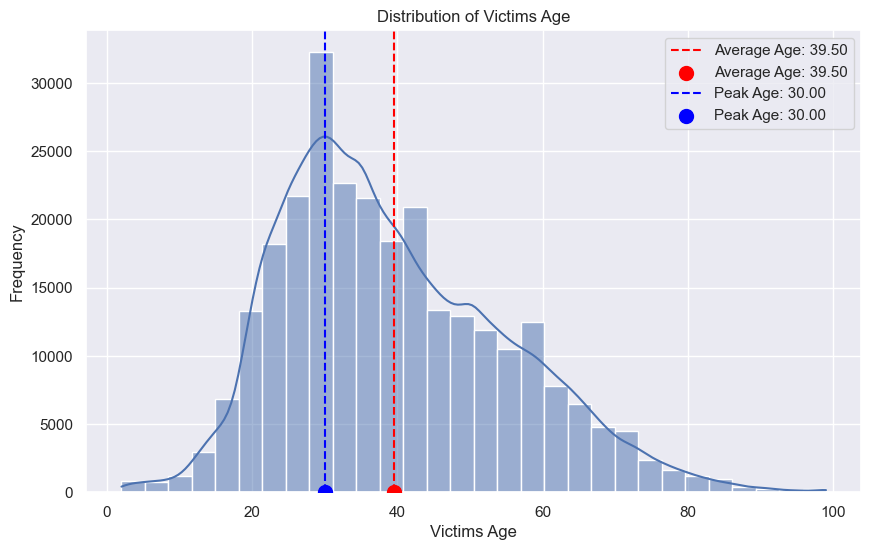

In [455]:
age_data = data[data['Vict Age'] > 0]['Vict Age'] #excluding unknown ages
peak_age = age_data.mode()[0]
avg_age = age_data.mean()

plt.figure(figsize=(10, 6))
sns.histplot(data[data['Vict Age'] > 0]['Vict Age'], bins=30, kde=True)

plt.axvline(avg_age, color='red', linestyle='dashed', label=f'Average Age: {avg_age:.2f}')
plt.scatter(avg_age, 0, color='red', zorder=5, s=100, label=f'Average Age: {avg_age:.2f}')
plt.axvline(peak_age, color='blue', linestyle='dashed', label=f'Peak Age: {peak_age:.2f}')
plt.scatter(peak_age, 0, color='blue', zorder=5, s=100, label=f'Peak Age: {peak_age:.2f}')

plt.title('Distribution of Victims Age')
plt.xlabel('Victims Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The distribution is left-skewed, suggesting that victims are generally younger. The peak age is around 30 years old, while the average age is 39.5 years.

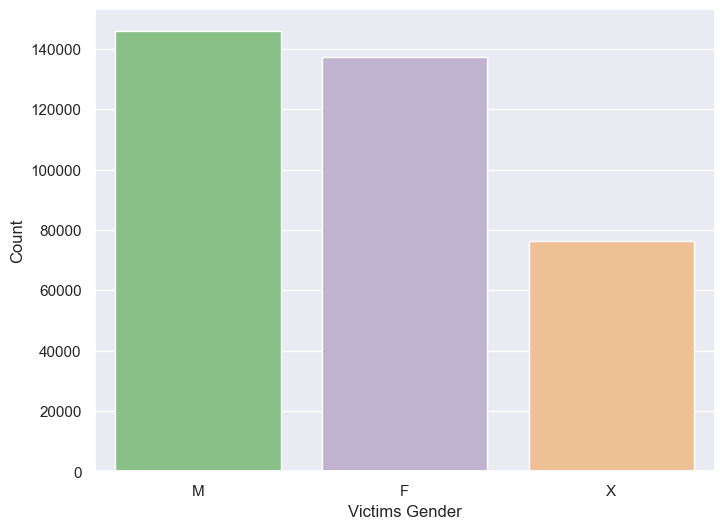

The percentage of 'X' from the total count of genders is 21.20%
Vict Sex
M    145819
F    137240
X     76162
H        46
Name: count, dtype: int64


In [456]:
counts = data['Vict Sex'].value_counts()

sorted_data = counts.sort_values(ascending=False).reset_index()
sorted_data.columns = ['Vict Sex', 'Count']

plt.figure(figsize=(8, 6))
plot = sns.barplot(x='Vict Sex', y='Count', data=sorted_data[~sorted_data['Vict Sex'].isin(['H'])], palette='Accent')
plt.xlabel('Victims Gender')
plt.ylabel('Count')
plt.show()

total_count = counts.sum()
percentage_X = (counts.get('X', 0) / total_count) * 100
print(f"The percentage of 'X' from the total count of genders is {percentage_X:.2f}%")
print(counts)

This categorical distribution represents the frequency of victims by gender. We can see that male (M) and female (F) victims are almost equally common, with males taking the lead. The unknown gender category (X) constitutes 21.2% of the total, which could significantly impact our analysis. If the 'X' category were not present or less common, we could gain a clearer understanding of the gender distribution among victims. P.S. 'H' is an unknown category, and was not referred to anywhere. Due to its low count (0.012%) we chose to exclude it and focus on broader gender trends. 

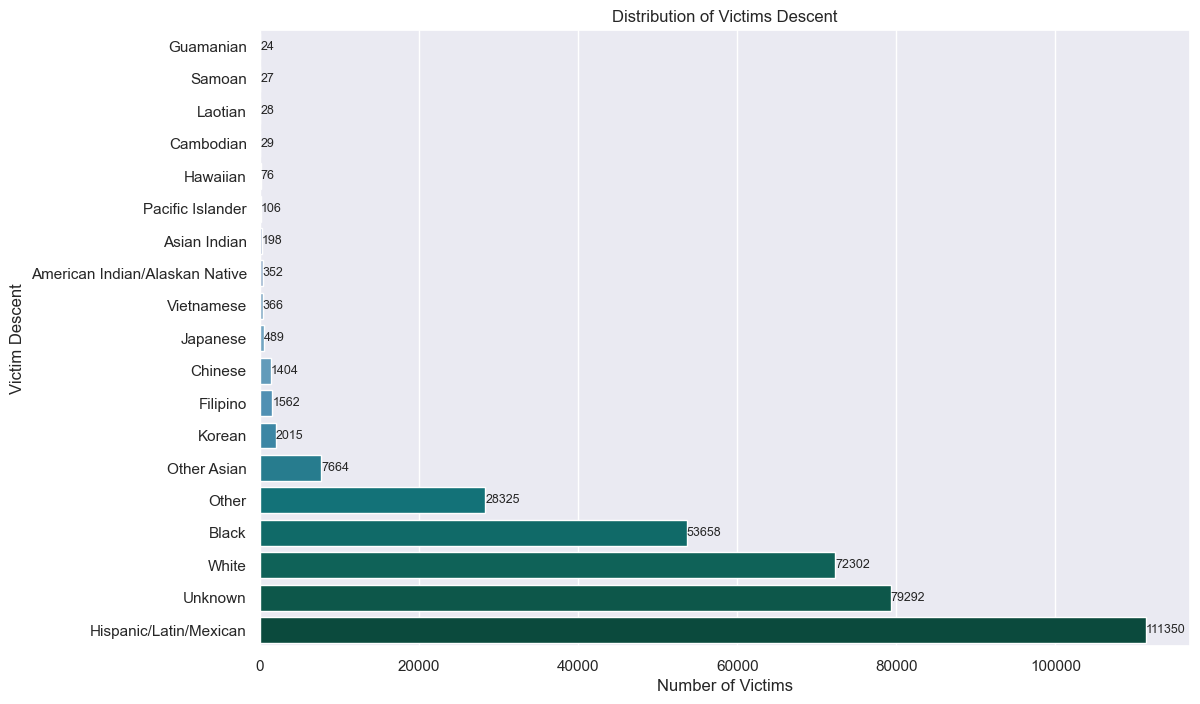

In [457]:
descent_mapping = { #map of descent codes found in the data card
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

data['Vict Descent Full'] = data['Vict Descent'].map(descent_mapping)
descent_counts = data['Vict Descent Full'].value_counts().sort_values()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=descent_counts.values, y=descent_counts.index, palette='PuBuGn')

for container in ax.containers: #adding count to each bar
    ax.bar_label(container, fmt='%d', fontsize=9)
    
plt.title('Distribution of Victims Descent')
plt.xlabel('Number of Victims')
plt.ylabel('Victim Descent')
plt.show()

This categorical distribution shows that "Hispanic/Latin/Mexican" victims are the most frequent, followed by "White", "Black" and "Other Asian". The "Unknown" category is notably large, potentially influencing the overall analysis which could significantly impact the reliability of any conclusions drawn about the distribution of other categories. 

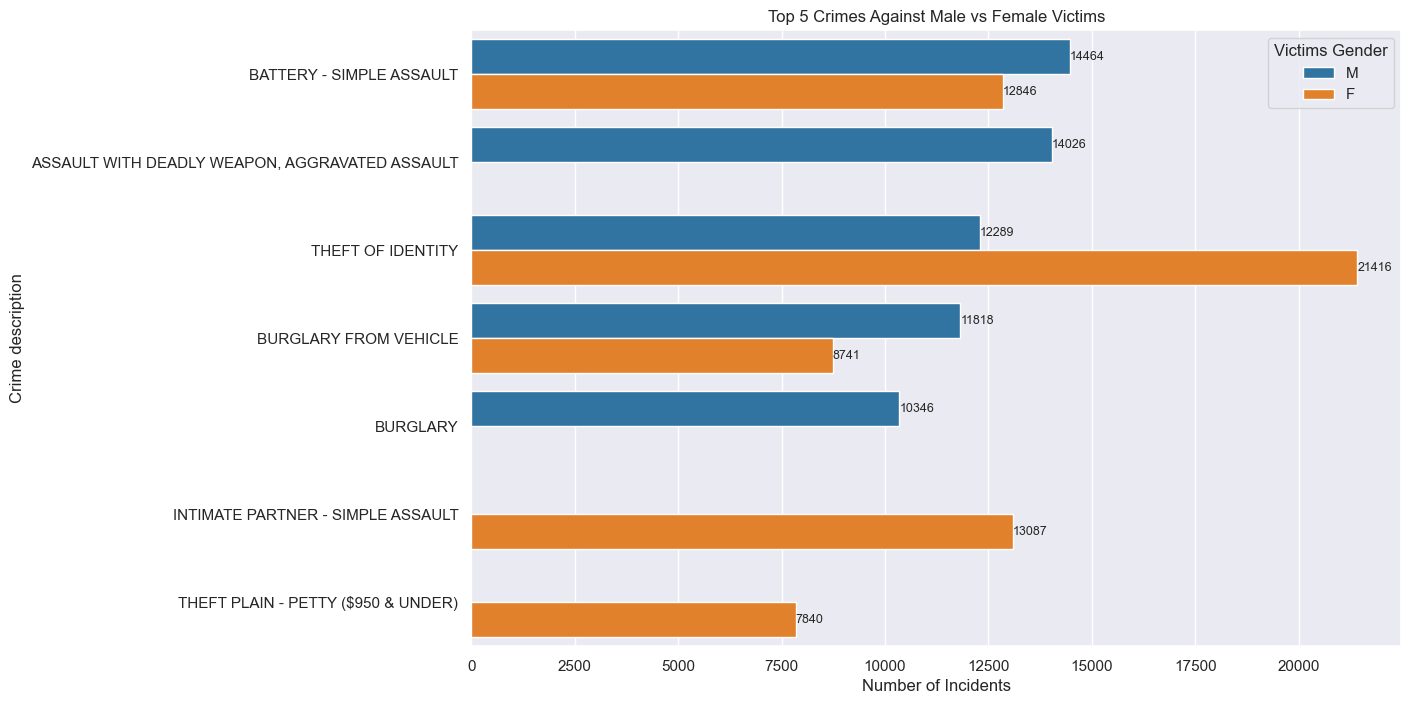

In [458]:
filtered_data = data[data['Vict Sex'].isin(['M', 'F'])]
crime_counts = filtered_data.groupby(['Vict Sex', 'Crm Cd Desc']).size().reset_index(name='Count')

#top 5 crimes for each sex
top_crimes_male = crime_counts[crime_counts['Vict Sex'] == 'M'].nlargest(5, 'Count')
top_crimes_female = crime_counts[crime_counts['Vict Sex'] == 'F'].nlargest(5, 'Count')

top_crimes = pd.concat([top_crimes_male, top_crimes_female])

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Count', y='Crm Cd Desc', hue='Vict Sex', data=top_crimes, palette="tab10")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9)
    
plt.title('Top 5 Crimes Against Male vs Female Victims')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime description')
plt.legend(title='Victims Gender')
plt.show()

This categorical distribution contrasts the 5 most common crimes against Male vs Female victims. Simple assault is the most common crime against both genders. Interestingly enough, theft of identity is the leading crime against females, whereas males are more frequently victims of assault with a deadly weapon. Notably, "Intimate Partner - Simple Assault" ranks among the top crimes exclusively for females, suggesting a higher occurrence of domestic violence. These differences highlight distinct victimization patterns between genders, which could be essential for developing targeted interventions by law enforcements.

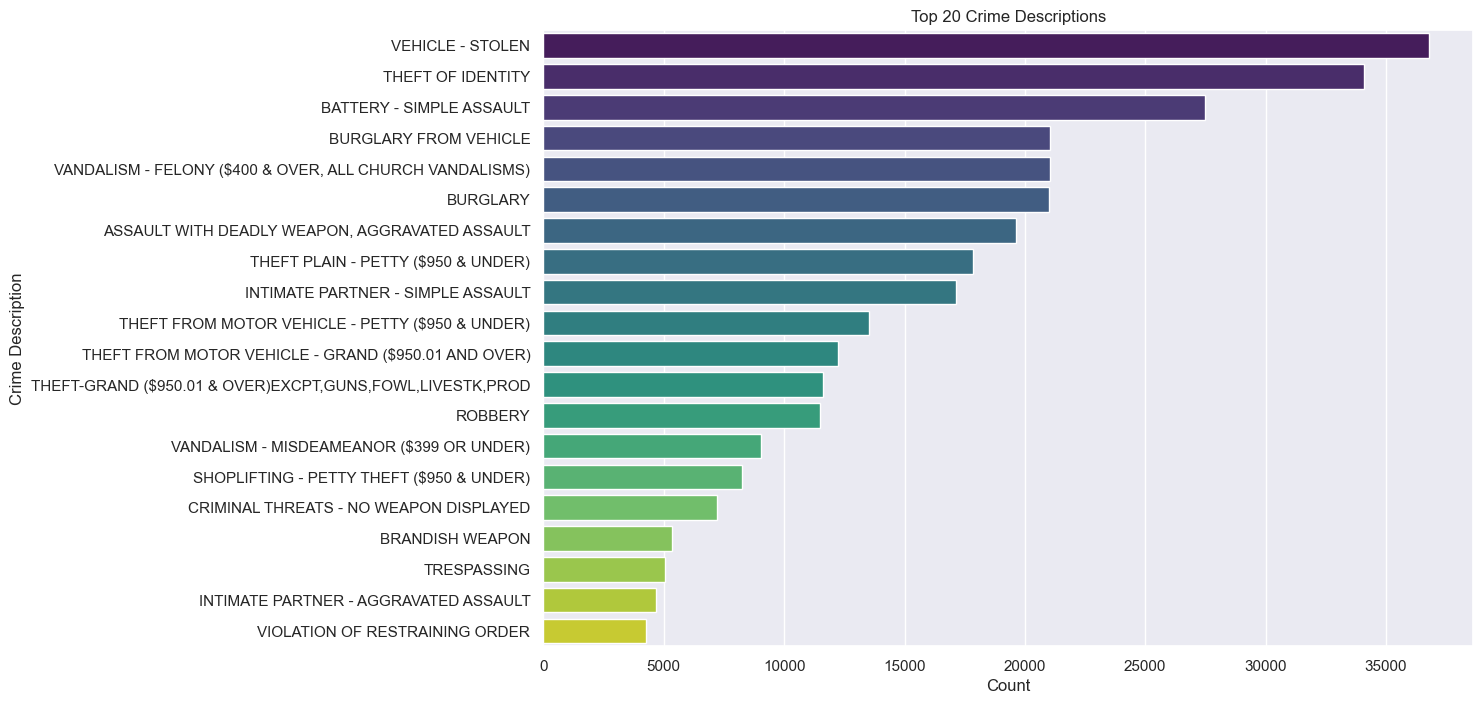

In [460]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Crm Cd Desc', data=data, order=data['Crm Cd Desc'].value_counts().index[:20],palette='viridis')
plt.title('Top 20 Crime Descriptions')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.show()

This plot illustrates the top 20 most frequent crime descriptions. Stealing of vechicles is the most common, followed by theft of identity and simple assaults. The distribution shows that property related crimes, such as theft and burglary, dominate the top of the list, as well as violent crimes like assault which appear to be frequent. 

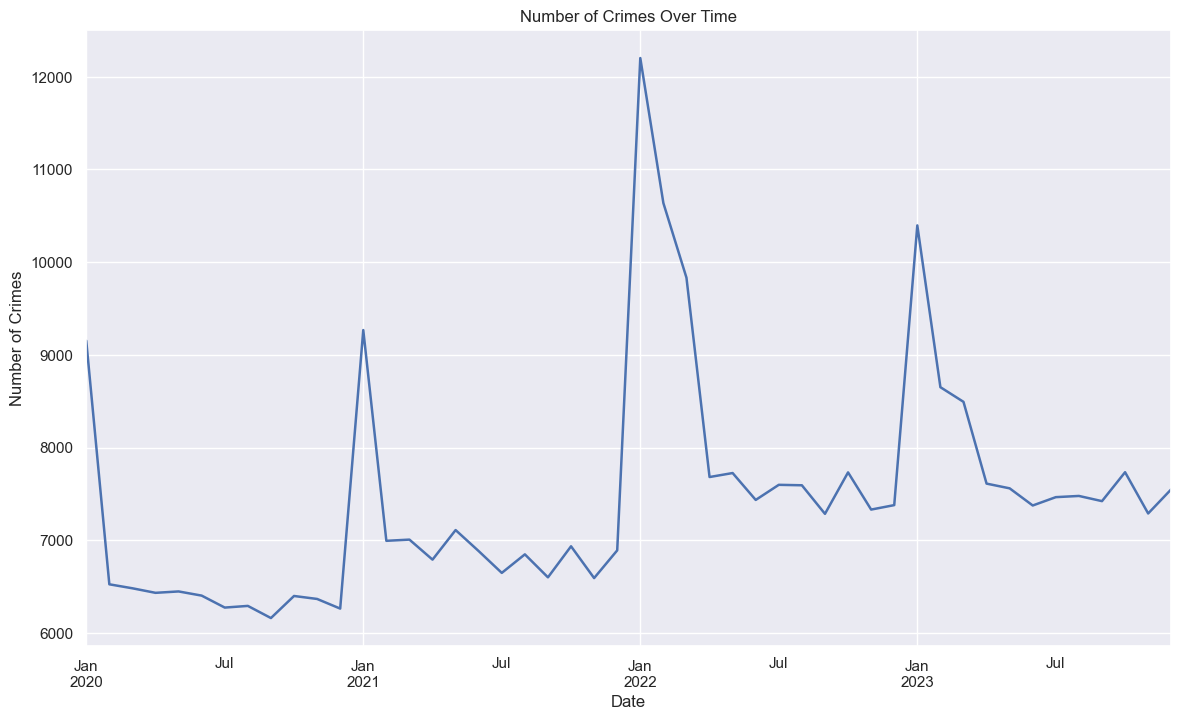

In [462]:
data.set_index('DATE OCC').resample('M').size().plot(figsize=(14, 8),linewidth=1.8)
plt.title('Number of Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

This plot illustrates the number of crimes over time, we can see the peak of crime is repetitively circling around the start of each year. In the next section, we will try to analyze why and find more information regarding this pattern.

### 2.2) Relationship Between variables

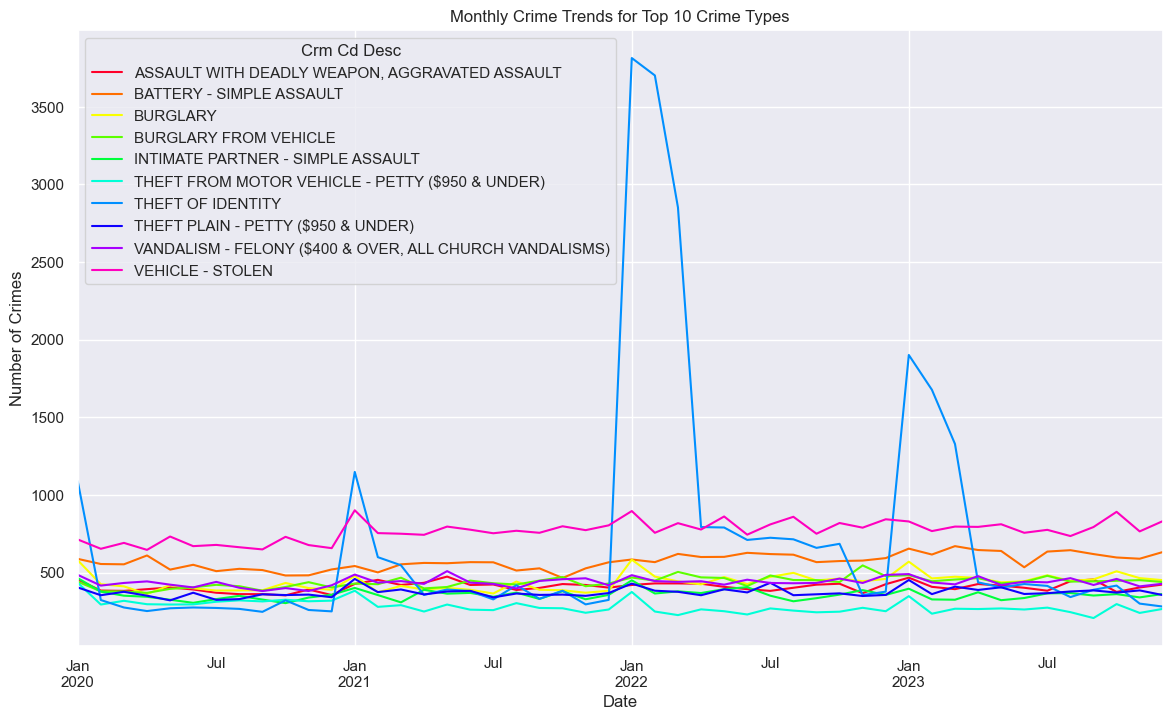

In [463]:
top_10_crimes = data['Crm Cd Desc'].value_counts().index[:10]
data_crime_top_10 = data[data['Crm Cd Desc'].isin(top_10_crimes)]

data_crime_top_10.set_index('DATE OCC').groupby('Crm Cd Desc').resample('M').size().unstack(0).plot(figsize=(14, 8),cmap='gist_rainbow')
plt.title('Monthly Crime Trends for Top 10 Crime Types')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

The plot shows monthly crime trends for the top 10 crime types over several years, most crime types remain relatively stable, with no substantial shifts. Although now, we have a clearer picture, and we can see that theft of identity is the reason behind the significant peaks around the start of each year, suggesting that while most crimes occur at a steady rate, identity theft has notable increases, possibly influenced by specific events or conditions during these months.

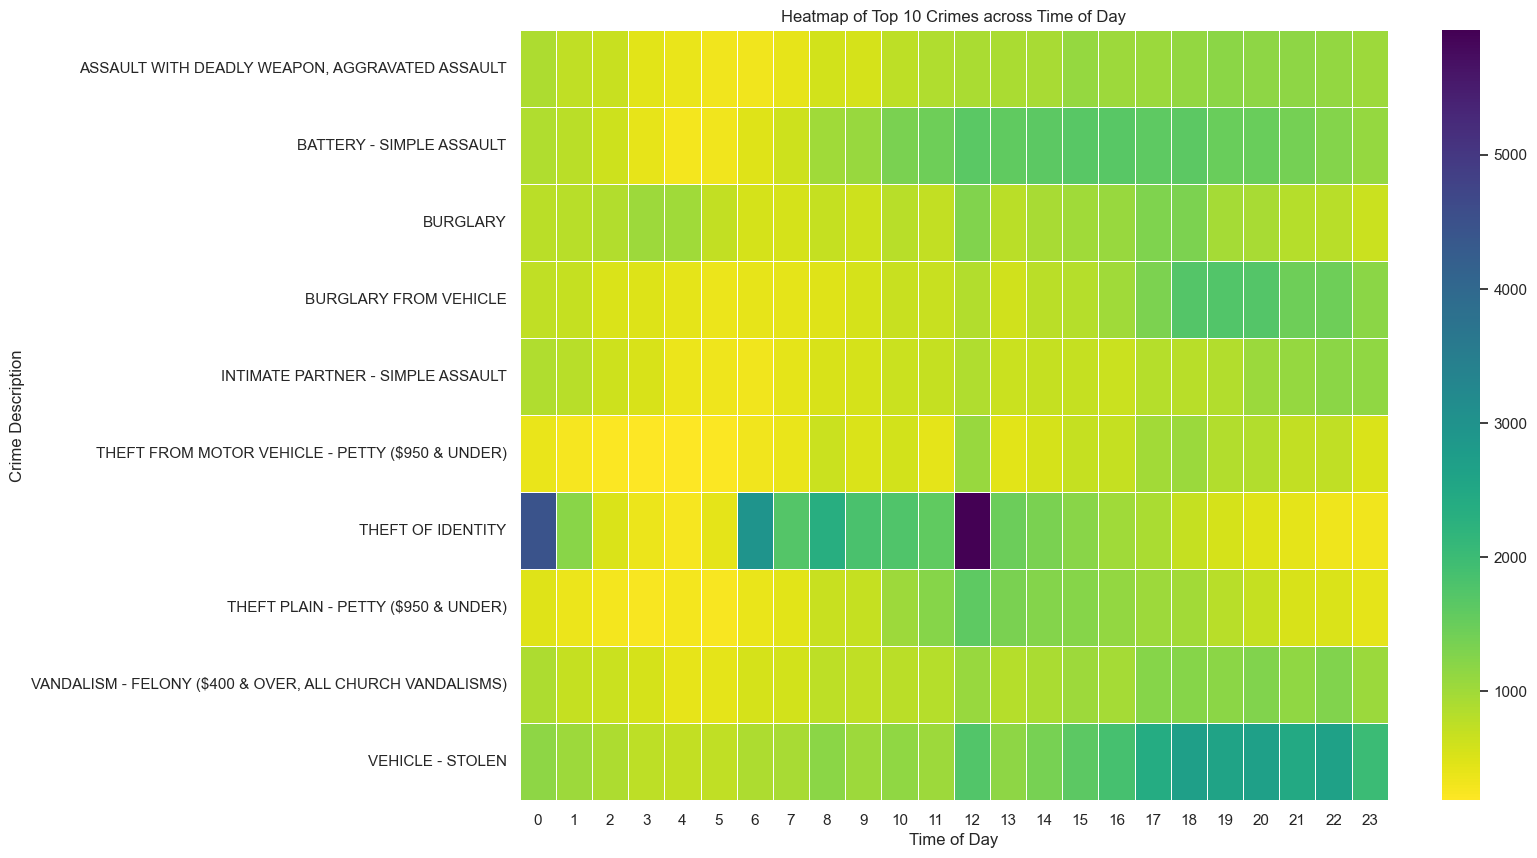

In [464]:
data['Hour'] = data['TIME OCC'].str.zfill(4).str[:2].astype(int)
filtered_data = data[data['Crm Cd Desc'].isin(top_10_crimes)]

crime_time_data = filtered_data.groupby(['Hour', 'Crm Cd Desc']).size().reset_index(name='count')
pivot_table = crime_time_data.pivot_table(index='Crm Cd Desc', columns='Hour', values='count', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='viridis_r', linewidths=.6)
plt.title('Heatmap of Top 10 Crimes across Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Crime Description')
plt.xticks(rotation=0) 
plt.show()

This heatmap illustrates the distribution of the top 10 crimes across different hours of the day. Most crimes show a fairly even distribution throughout the day, with no significant peaks at specific times. Stealing of vehicles, assault, burglary and theft seem to be more common between noon and evening hours. However, theft of identity shows higher occurrences late at night (00:00 AM - 02:00 AM) and in the morning until early afternoon hours, its peak at 12:00 PM. This suggests that while many crimes happen consistently throughout the day, certain types, like identity theft, may have distinct patterns, occurring more frequently during specific times, potentially reflecting opportunities or correlation to certain behaviors tied to these hours.